# IS 455 - Data Visualization
## Programming Assignment 3 - Rashmi Chhabria

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the csv data file
game_data = pd.read_csv('https://data.illinois.gov/dataset/2c47ae63-3be1-4985-904b-c5e5f4bf79ee/resource/aa78b062-07b2-40b4-8e24-e23778fa2f01/download/data.csv')

In [3]:
# Deleting invalid rows having zip code value as Online
game_data = game_data[game_data['zip_code']!='Online']

In [4]:
game_data

,game_name,month,total_ticket_sales,total_ticket_sales_count,year,zip_code
8,EZ Match,January,3344.0,"3,344",2017,60002
9,Instant Rollup,January,364200.0,Not Tracked,2017,60002
10,Lotto,January,22696.0,"6,883",2017,60002
11,Lucky Day Lotto,January,27941.0,"11,913",2017,60002
12,Mega Millions,January,21131.0,"7,693",2017,60002
...,...,...,...,...,...,...
995,Pick 4,January,94370.5,"128,838",2017,60154
996,Pick4 Fireball,January,32219.5,"45,066",2017,60154
997,Powerball,January,26680.0,"6,664",2017,60154
998,EZ Match,January,1133.0,"1,133",2017,60155


In [5]:
# Finding the lowest zip code
game_data['zip_code'].min()

'60002'

In [6]:
# Listing all entries with a sales amount lower than 60000
game_data[game_data['total_ticket_sales'] < 60000]

,game_name,month,total_ticket_sales,total_ticket_sales_count,year,zip_code
8,EZ Match,January,3344.0,"3,344",2017,60002
10,Lotto,January,22696.0,"6,883",2017,60002
11,Lucky Day Lotto,January,27941.0,"11,913",2017,60002
12,Mega Millions,January,21131.0,"7,693",2017,60002
13,Pick 3,January,21482.5,"19,999",2017,60002
...,...,...,...,...,...,...
992,Mega Millions,January,27513.0,"9,271",2017,60154
994,Pick3 Fireball,January,21003.0,"25,662",2017,60154
996,Pick4 Fireball,January,32219.5,"45,066",2017,60154
997,Powerball,January,26680.0,"6,664",2017,60154


In [7]:
# Considering only the first 20 entries in the file
game_plot = game_data[['total_ticket_sales', 'zip_code']].iloc[0:21]

In [8]:
# Set Index
game_plot = game_plot.set_index('zip_code')

In [9]:
# Grouping data to get total sales for every zip code
game_zip = game_plot.groupby(['zip_code']).sum()
game_zip

,total_ticket_sales
zip_code,
60002,500741.0
60004,491127.0
60005,3178.0


<AxesSubplot:xlabel='zip_code'>

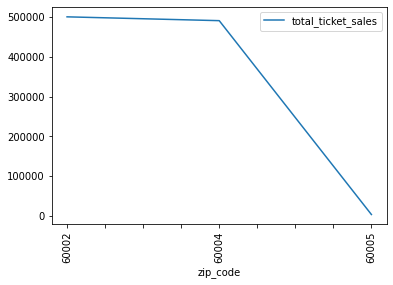

In [10]:
# Basic Plot
game_zip.plot(rot=90)

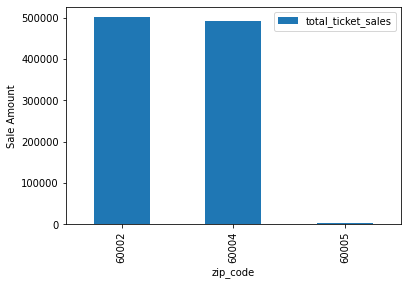

In [11]:
# Vertical Bar Graph
game_zip.plot(kind='bar', ylabel='Sale Amount')
plt.show()

In [12]:
# Reset Index
game_zip = game_zip.reset_index()

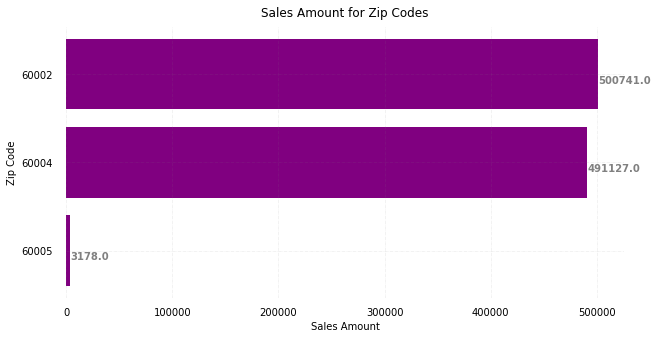

In [13]:
# Horizontal Bar Graph
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(game_zip.iloc[:,0], game_zip.iloc[:,1], color = 'purple')

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Sales Amount for Zip Codes',
             loc='center', pad=10)

# Add Axis Labels
ax.set_ylabel('Zip Code')
ax.set_xlabel('Sales Amount')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

# Show Plot
plt.show()

# Explanation:
I chose the horizontal bar plot since there were only 3 distinct zip codes in the selected sample data. A line plot did not seem to highlight the difference of sales in the 3 zip codes as much as individual bars did and since there weren't many bars to plot, I rotated it into a horizontal plot instead of a vertical one. This does not look lengthy as such with the three bars, and I find it to be a clean visualization.